In [14]:
import os, sys

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

from foldingdiff import plotting

In [4]:
sctm_table = pd.read_csv(
    "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/sctm_scores_proteinmpnn_tm_scores.csv",
    index_col=0,
)
sctm_table.head()

,id,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable
0,generated_202,0.39745,0.46674,70,1,3,omegafold_predictions_proteinmpnn/generated_20...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False
1,generated_414,0.36039,0.46756,91,2,2,omegafold_predictions_proteinmpnn/generated_41...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
2,generated_309,0.49600,0.60337,80,4,0,omegafold_predictions_proteinmpnn/generated_30...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
3,generated_529,0.29100,0.36524,102,0,6,omegafold_predictions_proteinmpnn/generated_52...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
4,generated_194,0.42942,0.47160,69,3,2,omegafold_predictions_proteinmpnn/generated_19...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False


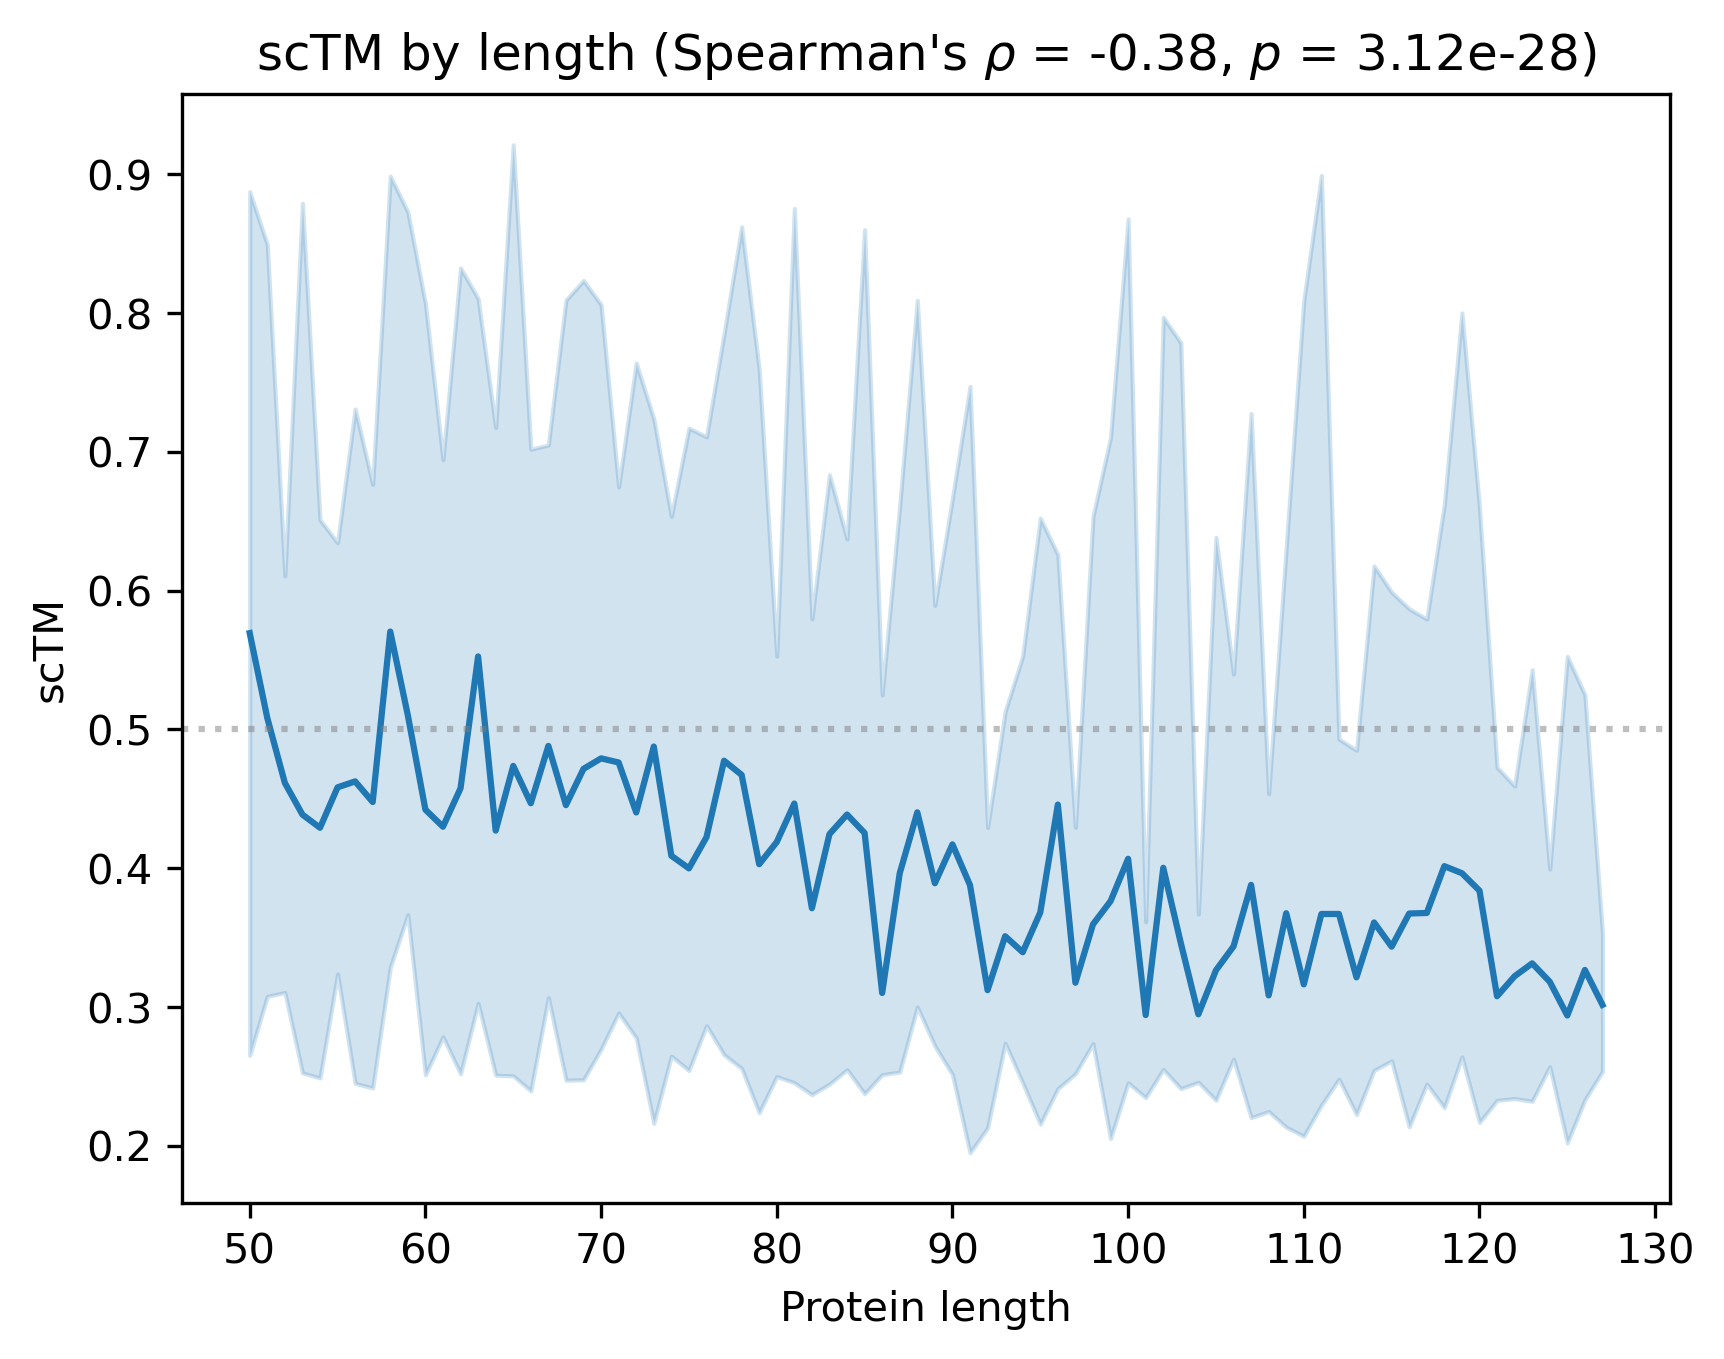

In [32]:
corr, pval = stats.spearmanr(sctm_table['length_int'], sctm_table['scTM'])

fig, ax = plt.subplots(dpi=300)
sns.lineplot(
    data=sctm_table,
    x='length_int',
    y='scTM',
    ax=ax,
    errorbar=lambda x: (np.min(x), np.max(x)),
    estimator=np.mean,
)
ax.axhline(0.5, alpha=0.5, linestyle='dotted', color='tab:grey')
ax.set(
    xlabel="Protein length",
    ylabel="scTM",
    title="scTM by length (Spearman's $\\rho$ = {:.2f}, $p$ = {:.2e})".format(corr, pval),
)
fig.savefig(
    os.path.join(plotting.PLOT_DIR, "sctm_by_len.pdf"),
    bbox_inches='tight',
)
fig.show()